In [8]:
# Load the necessary packages
import numpy as np
import pandas as pd
import statistics 
import math
import requests
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis
> make connection to online dataframe -> establish a local file and write data into the local file

In [9]:
remote_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls'
response = requests.get(remote_url) 
output = open('Concrete_Data.xls', 'wb') 
output.write(response.content)
output.close()

> open into panda dataframe -> test and summarize the data

In [10]:
df = pd.read_excel("Concrete_Data.xls")

In [11]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [12]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


### Observations about the data model.
* 9 Columns 
* 1030 Rows 

> We rename the columns to make working with them easier.

In [13]:
df.columns = ['Cement','BlastFurnaceSlag','FlyAsh','Water','Superplasticizer','CoarseAggregate',
                'FineAggregate','Age','ConcreteCompressiveStrength']

In [14]:
df

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [15]:
df.dtypes

Cement                         float64
BlastFurnaceSlag               float64
FlyAsh                         float64
Water                          float64
Superplasticizer               float64
CoarseAggregate                float64
FineAggregate                  float64
Age                              int64
ConcreteCompressiveStrength    float64
dtype: object

> Check for Null values

In [16]:
df.isna().sum()

Cement                         0
BlastFurnaceSlag               0
FlyAsh                         0
Water                          0
Superplasticizer               0
CoarseAggregate                0
FineAggregate                  0
Age                            0
ConcreteCompressiveStrength    0
dtype: int64

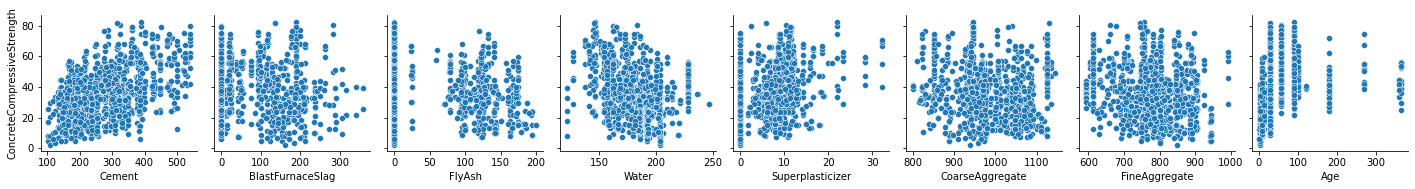

In [17]:
sns.pairplot(df,y_vars=['ConcreteCompressiveStrength'],x_vars=['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water','Superplasticizer','CoarseAggregate','FineAggregate','Age'])

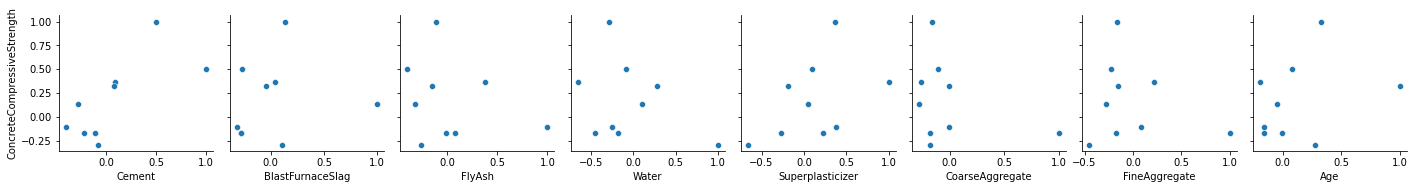

In [18]:
corr = df.corr()
sns.pairplot(corr,y_vars=['ConcreteCompressiveStrength'],x_vars=['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water','Superplasticizer','CoarseAggregate','FineAggregate','Age'])


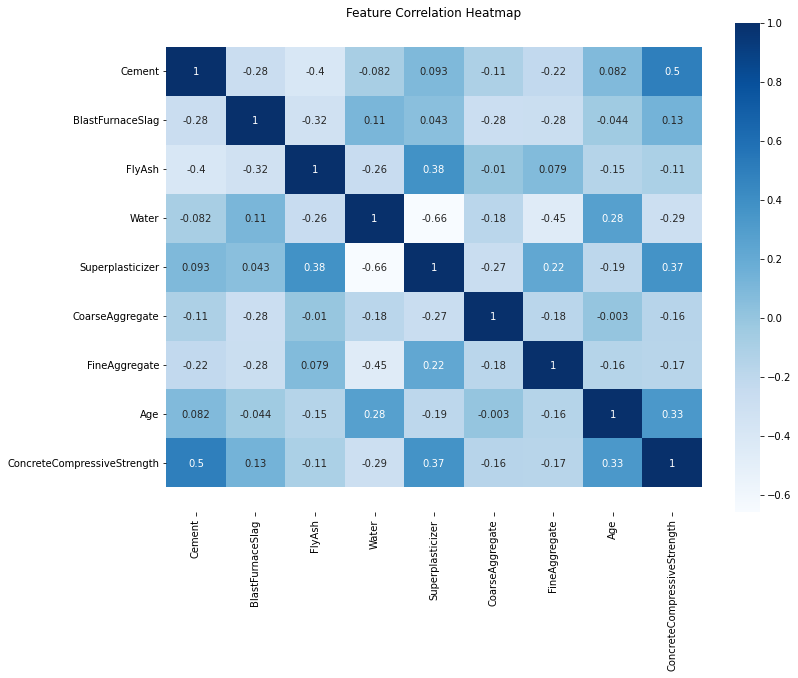

In [19]:
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## Initial Observations
The 4 greatest correlations are **Water, Age, Superplasticizer,** and the greatest of them is **Cement** at **.5**. We do also see some correlations between certain features such as **Superplasticizer** and **Water**, as well as **Cement** and **Blast Furnace Slag**.



### Further Investigating the Cement relationship to CC_Strength

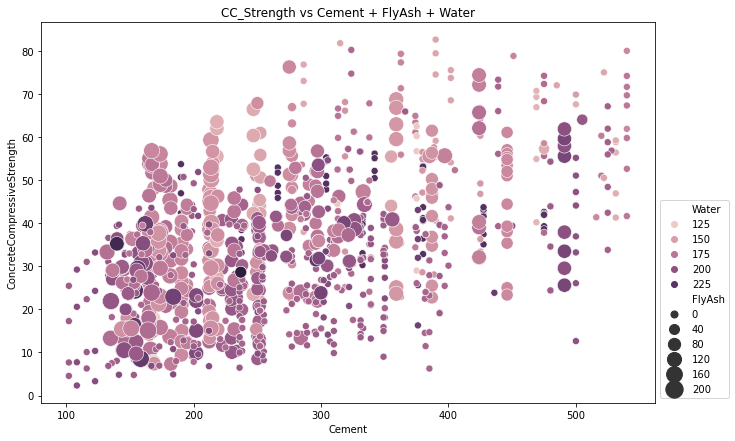

In [20]:
fig, ax = plt.subplots(figsize=(11,7))
sns.scatterplot(y="ConcreteCompressiveStrength", x="Cement", hue="Water", size="FlyAsh", data=df, ax=ax, sizes=(50, 300))
ax.set_title("CC_Strength vs Cement + FlyAsh + Water")
ax.legend(loc="lower left", bbox_to_anchor=(1,0))
plt.show()

## This scatter plot shows the negative relationship betweeen FlyAsh and Water, as well as the positive relationship betweeen cement and concrete compressive strength.

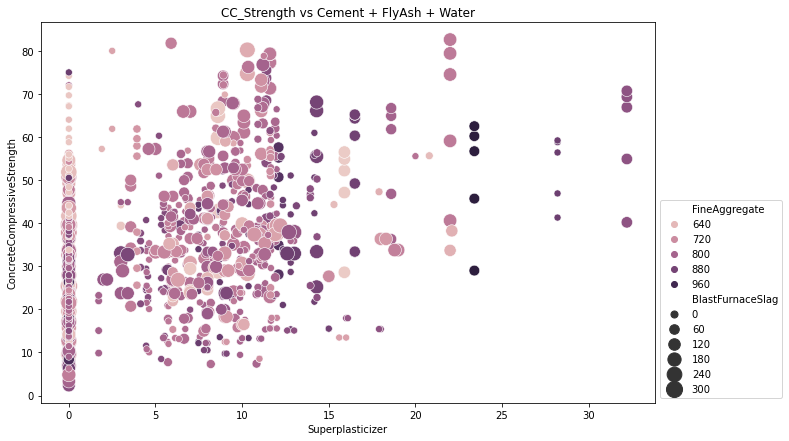

In [21]:
fig, ax = plt.subplots(figsize=(11,7))
sns.scatterplot(y="ConcreteCompressiveStrength", x="Superplasticizer", hue="FineAggregate", size="BlastFurnaceSlag", data=df, ax=ax, sizes=(50, 300))
ax.set_title("CC_Strength vs Cement + FlyAsh + Water")
ax.legend(loc="lower left", bbox_to_anchor=(1,0))
plt.show()

## This scatter plot shows the positive relationship between Superplasticizer and Concrete Compressive Strength, as well as the negative relationship between Fine Aggregate and Blast Furnace Slag.

In [22]:
model = smf.ols('ConcreteCompressiveStrength ~ Cement + BlastFurnaceSlag + FlyAsh + Water + Superplasticizer + CoarseAggregate + FineAggregate + Age', data=df) # model object constructor syntax
model = model.fit()
pred = model.predict()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     ConcreteCompressiveStrength   R-squared:                       0.615
Model:                                     OLS   Adj. R-squared:                  0.612
Method:                          Least Squares   F-statistic:                     204.3
Date:                         Tue, 03 May 2022   Prob (F-statistic):          6.76e-206
Time:                                 18:44:10   Log-Likelihood:                -3869.0
No. Observations:                         1030   AIC:                             7756.
Df Residuals:                             1021   BIC:                             7800.
Df Model:                                    8                                         
Covariance Type:                     nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

# Linear Regression

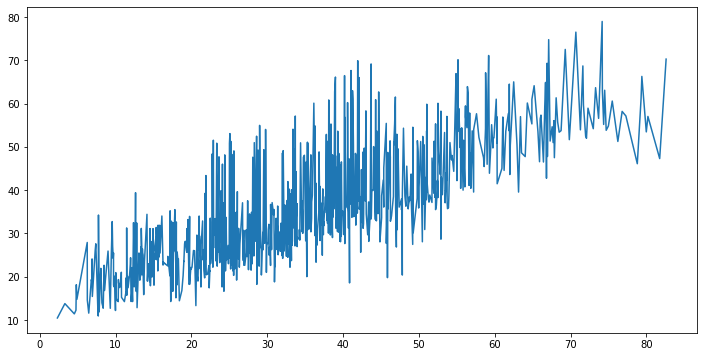

In [23]:
b0 = model.params[0]
b1 = model.params[1]
b2 = model.params[2]
b3 = model.params[3]
b4 = model.params[4]
b5 = model.params[5]
b6 = model.params[6]
b7 = model.params[7]
b8 = model.params[8]

sdf=df.sort_values("ConcreteCompressiveStrength")

s = b0+b1*sdf['Cement']+b2*sdf['BlastFurnaceSlag']+b3*sdf['FlyAsh']+b4*sdf['Water']+b5*sdf['Superplasticizer']+b6*sdf['CoarseAggregate']+b7*sdf['FineAggregate']+b8*sdf['Age']

plt.figure(figsize=[12,6])
plt.plot(sdf['ConcreteCompressiveStrength'],s)

# Logistical Regression

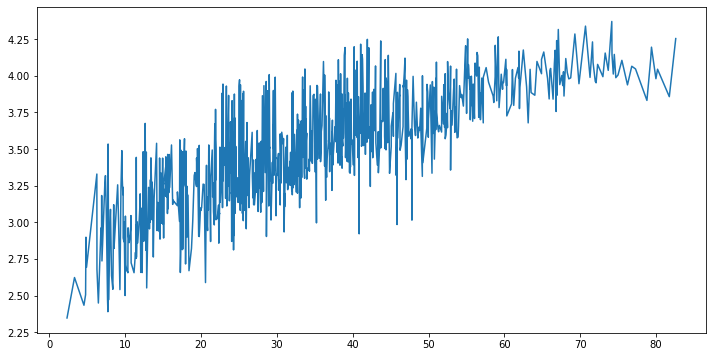

In [24]:
ls = np.log(b0+b1*sdf['Cement']+b2*sdf['BlastFurnaceSlag']+b3*sdf['FlyAsh']+b4*sdf['Water']+b5*sdf['Superplasticizer']+b6*sdf['CoarseAggregate']+b7*sdf['FineAggregate']+b8*sdf['Age'])

plt.figure(figsize=[12,6])
plt.plot(sdf['ConcreteCompressiveStrength'],ls)

# Expontential Regression

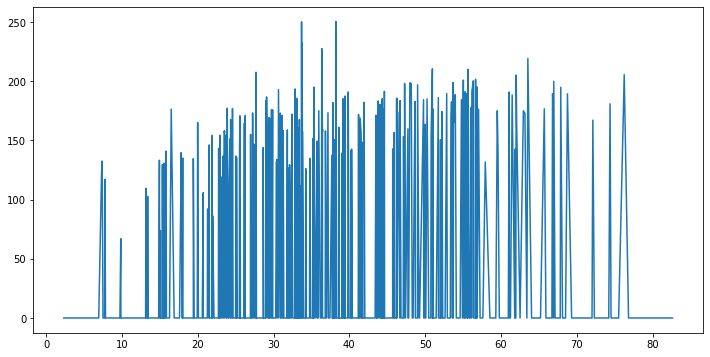

In [25]:
es = b0*(sdf['Cement']**b1*sdf['BlastFurnaceSlag']**b2*sdf['FlyAsh']**b3*sdf['Water']**b4*sdf['Superplasticizer']**b5*sdf['CoarseAggregate']**b6*sdf['FineAggregate']**b7*sdf['Age']**b8)

plt.figure(figsize=[12,6])
plt.plot(sdf['ConcreteCompressiveStrength'],np.abs(es))

# R^2 and RMSE Values

In [26]:
lrr2 = r2_score(sdf['ConcreteCompressiveStrength'],s)
logr2 = r2_score(sdf['ConcreteCompressiveStrength'],ls)
expr2 = r2_score(sdf['ConcreteCompressiveStrength'],es)

In [27]:
lrrmse=np.sqrt(mean_squared_error(sdf['ConcreteCompressiveStrength'],s))
logrmse=np.sqrt(mean_squared_error(sdf['ConcreteCompressiveStrength'],ls))
exprmse=np.sqrt(mean_squared_error(sdf['ConcreteCompressiveStrength'],es))

In [28]:
print("R2 value for linear regression:",lrr2)

print("R2 value for log regression:",logr2)

print("R2 value for exponential regression:",expr2)

print("RMSE value for linear regression:",lrrmse)

print("RMSE value for log regression:",logrmse)

print("RMSE value for exponential regression:",exprmse)

R2 value for linear regression: 0.6154647342687215
R2 value for log regression: -3.70876143736164
R2 value for exponential regression: -36.371759357142366
RMSE value for linear regression: 10.354313243016426
RMSE value for log regression: 36.23318870101013
RMSE value for exponential regression: 102.07631503629958


In [29]:
X = sdf.iloc[:,0:8] # Features 
y = sdf.iloc[:,-1:] # Target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [30]:
# Linear Regression 
lr = LinearRegression() 
# Lasso Regression 
lasso = Lasso() 
# Fitting models on Training data 
lr.fit(X_train, y_train) 
lasso.fit(X_train, y_train) 
# Making predictions on Test data 
y_pred_lr = lr.predict(X_test) 
y_pred_lasso = lasso.predict(X_test) 

print("Model\t\t\t RMSE \t\t R2") 
print("""LinearRegression \t {:.2f} \t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_pred_lr)), r2_score(y_test, y_pred_lr))) 
print("""LassoRegression \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_lasso)), r2_score(y_test, y_pred_lasso))) 

Model			 RMSE 		 R2
LinearRegression 	 10.16 		0.61
LassoRegression 	 10.89 		0.55


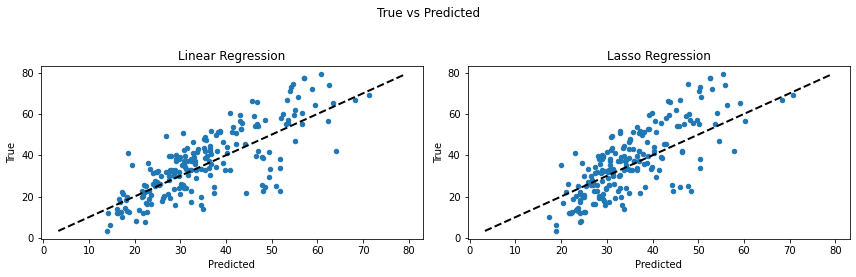

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4)) 
ax1.scatter(y_pred_lr, y_test, s=20) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("Linear Regression") 
ax2.scatter(y_pred_lasso, y_test, s=20) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax2.set_ylabel("True") 
ax2.set_xlabel("Predicted") 
ax2.set_title("Lasso Regression") 
fig.suptitle("True vs Predicted") 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Model				 RMSE 		 R2
Decision Tree Regressor 	 7.51 		0.79


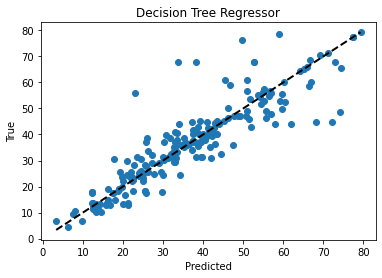

In [32]:
dtr = DecisionTreeRegressor() 
dtr.fit(X_train, y_train) 
y_pred_dtr = dtr.predict(X_test) 
print("Model\t\t\t\t RMSE \t\t R2") 
print("""Decision Tree Regressor \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_dtr)), r2_score(y_test, y_pred_dtr))) 
plt.scatter(y_test, y_pred_dtr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Decision Tree Regressor") 
plt.show()

Model				 RMSE 		 R2
Random Forest Regressor 	 5.14 		0.90


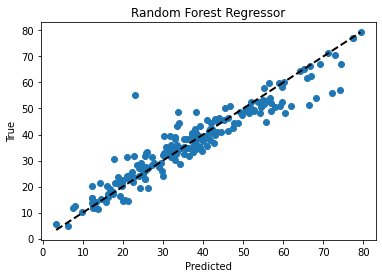

In [33]:
rfr = RandomForestRegressor(n_estimators=100) 
rfr.fit(X_train, y_train) 
y_pred_rfr = rfr.predict(X_test) 
print("Model\t\t\t\t RMSE \t\t R2") 
print("""Random Forest Regressor \t {:.2f} \t\t{:.2f}""".format(np.sqrt(mean_squared_error(y_test, y_pred_rfr)),r2_score(y_test,y_pred_rfr)))
plt.scatter(y_test, y_pred_rfr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Random Forest Regressor") 
plt.show()


As we can see not only from visual observation, but also by the R sqared of ~.9, The Random Forest Regressor is the best model for predicting concrete compressive strength.

# 5 User input

Here we made a user input interface so we can predict as many new/random mixtures we want.

In [34]:
one = input("Would you like to add values?(Y/N)")
if(( one != 'Y') and (one != 'N')):
    one=input("That answer is not valid, try again.")
while (one == "Y"):
    Cement_value = float(input("Enter Cement value here:"))
    Blast_Furnace_Slag = float(input('Enter Blast Furncace Slag Value:'))
    Fly_Ash = float(input('Enter Fly Ash here:'))
    Water_value = float(input('Enter Water value here:')) 
    Superplasterizer_value = float(input('Enter Superplasterizer value here:')) 
    Course_aggragate_value = float(input('Enter Course Aggreagate value here:')) 
    Fine_Aggragate = float(input('Enter Fine Aggregate value here:')) 
    Age = float(input('Enter Age value here:')) 

    AVFQ = [[Cement_value, Blast_Furnace_Slag, Fly_Ash,Water_value, Superplasterizer_value, Course_aggragate_value, Fine_Aggragate, Age]]
    pred=rfr.predict(AVFQ)
    print(pred)
    df.loc[len(df.index)] = [Cement_value, Blast_Furnace_Slag, Fly_Ash,Water_value, Superplasterizer_value, Course_aggragate_value, Fine_Aggragate, Age,pred[0]]
    one= input("Keep going?'Y/N'")
    if(( one != 'Y') and (one != 'N')):
        one=input("That answer is not valid, try again.")
    if (one =='N'):
        break



Would you like to add values?(Y/N) Y
Enter Cement value here: 175
Enter Blast Furncace Slag Value: 11
Enter Fly Ash here: 171
Enter Water value here: 155
Enter Superplasterizer value here: 3
Enter Course Aggreagate value here: 1000
Enter Fine Aggregate value here: 854
Enter Age value here: 3


[63.31627325]


Keep going?'Y/N' Y
Enter Cement value here: 174
Enter Blast Furncace Slag Value: 12
Enter Fly Ash here: 171
Enter Water value here: 154
Enter Superplasterizer value here: 2
Enter Course Aggreagate value here: 999
Enter Fine Aggregate value here: 858
Enter Age value here: 3


[63.31627325]


Keep going?'Y/N' Y
Enter Cement value here: 178
Enter Blast Furncace Slag Value: 15
Enter Fly Ash here: 174
Enter Water value here: 159
Enter Superplasterizer value here: 5
Enter Course Aggreagate value here: 1002
Enter Fine Aggregate value here: 857
Enter Age value here: 5


[63.34203897]


Keep going?'Y/N' Y
Enter Cement value here: 173
Enter Blast Furncace Slag Value: 12
Enter Fly Ash here: 173
Enter Water value here: 4
Enter Superplasterizer value here: 999
Enter Course Aggreagate value here: 856
Enter Fine Aggregate value here: 4
Enter Age value here: 4


[63.34203897]


Keep going?'Y/N' Y
Enter Cement value here: 177
Enter Blast Furncace Slag Value: 13
Enter Fly Ash here: 174
Enter Water value here: 154
Enter Superplasterizer value here: 2
Enter Course Aggreagate value here: 998
Enter Fine Aggregate value here: 854
Enter Age value here: 3


[63.31627325]


Keep going?'Y/N' Y
Enter Cement value here: 172
Enter Blast Furncace Slag Value: 11
Enter Fly Ash here: 170
Enter Water value here: 153
Enter Superplasterizer value here: 2
Enter Course Aggreagate value here: 1001
Enter Fine Aggregate value here: 856
Enter Age value here: 5


[63.34203897]


Keep going?'Y/N' N


In [91]:
df

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05278
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.768036


https://youtu.be/An2KJdnL-QU